# Model training: Naive Bayes

We use Naive Bayes to obtain our prediction model. As this is a fairly simple model to train, this will be use as a baseline for the other models. 

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Loading the data

In [2]:
path = '/Users/louispht/Dropbox/git_projects/news_classifier/Data cleaning/Pickles/'

# Dataframe
with open(path + 'df_all_noact.pickle', 'rb') as data:
    df_all = pickle.load(data)

# features_train
with open(path + 'features_train_noact.pickle', 'rb') as data:
    features_train = pickle.load(data)

# y_train
with open(path + 'y_train_noact.pickle', 'rb') as data:
    y_train = pickle.load(data)

# features_test
with open(path + 'features_test_noact.pickle', 'rb') as data:
    features_test = pickle.load(data)

# y_test
with open(path + 'y_test_noact.pickle', 'rb') as data:
    y_test = pickle.load(data)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Data columns (total 7 columns):
index              9771 non-null int64
title              9771 non-null object
content            9771 non-null object
link               9771 non-null object
category           9771 non-null object
news_length        9771 non-null int64
cleaned_content    9771 non-null object
dtypes: int64(2), object(5)
memory usage: 534.5+ KB


In [3]:
features_train.shape

(8641, 500)

In [4]:
features_test.shape

(1130, 500)

In [5]:
y_train.shape

(8641,)

In [6]:
y_test.shape

(1130,)

### Naive Bayes Model

In [9]:
mnb = MultinomialNB().fit(features_train, y_train)

In [10]:
y_predict = mnb.predict(features_test)

### Performance Analysis

We use confusion matrix, the classification report and accuracy to analyse the performance.

In [11]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, mnb.predict(features_train)))

The training accuracy is: 
0.8988542992709178


In [12]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, y_predict))

The test accuracy is: 
0.8654867256637168


In [13]:
# Classification report
categories = {'affaires':0, 'sports':3, 'international':2, 'culture':1}
print("Classification report")
print(classification_report(y_test,y_predict, target_names=categories))

Classification report
               precision    recall  f1-score   support

     affaires       0.82      0.89      0.86       243
       sports       0.88      0.81      0.85       274
international       0.75      0.91      0.82       220
      culture       0.97      0.87      0.91       393

     accuracy                           0.87      1130
    macro avg       0.86      0.87      0.86      1130
 weighted avg       0.87      0.87      0.87      1130



#### Confusion matrix

We first get our dataframe with the labels. 

In [14]:
# df_all_le
with open(path + 'df_all_le_noact.pickle', 'rb') as data:
    df_all_le = pickle.load(data)

In [28]:
df_all_le.head(2)

,index,title,content,link,category,news_length,cleaned_content,label_enc
0,0,"Oui, Marie-Josée Lord est une chanteuse d'opéra!",«Je ne suis pas une chanteuse d'opéra.» Marie-...,https://www.lapresse.ca/arts/festivals/montrea...,culture,3137,chanteux oper mariejos lord laiss tomb c...,1
1,1,Une vallée sans foi ni loi,C'était une paisible vallée agricole où les po...,https://www.lapresse.ca/international/amerique...,international,7051,paisibl vall agricol où polici regl chican...,2


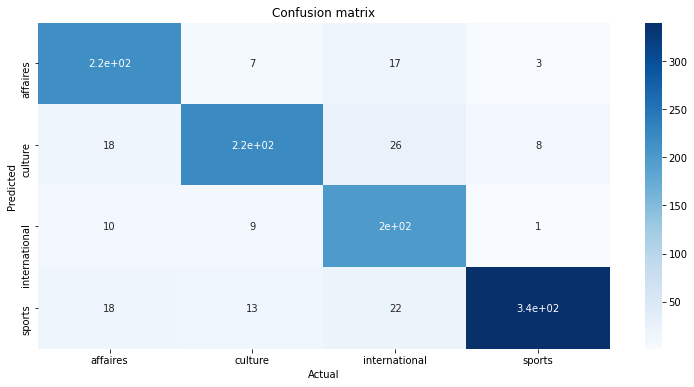

In [15]:
#Confusion matrix
aux_df = df_all_le[['category', 'label_enc']].drop_duplicates().sort_values('category')
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### Saving the model

In [16]:
d = {
     'Model': 'MultinomialNaiveBayes',
     'Training Set Accuracy': accuracy_score(y_train, mnb.predict(features_train)),
     'Test Set Accuracy': accuracy_score(y_test, y_predict)
}

df_models_mnb = pd.DataFrame(d, index=[0])

In [17]:
df_models_mnb

,Model,Training Set Accuracy,Test Set Accuracy
0,MultinomialNaiveBayes,0.898854,0.865487


In [18]:
with open('Models/best_mnb_noact.pickle', 'wb') as output:
    pickle.dump(mnb, output)
    
with open('Models/df_models_mnb_noact.pickle', 'wb') as output:
    pickle.dump(df_models_mnb, output)